# SciPy

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize as op

In [4]:
def fnc(x):
    return x**2-2

In [5]:
fnc(1)

-1

In [6]:
(lambda x:x**2-2)(1)

-1

In [7]:
def evalf(fname):
    return fname(100)

In [8]:
evalf(fnc)

9998

In [9]:
evalf(lambda x:x**3-2)

999998

In [10]:
(lambda x,y:x**2+y**2)(2,2)

8

In [11]:
op.newton(fnc,-0.1)

np.float64(-1.4142135623730823)

In [12]:
def myenwton(f,df,x0,err=1e-4,maxiter=100):
    value = f(x0)
    xG=x0
    i=0
    while value**2 > err and i < maxiter:
        xG+=-f(xG)/df(xG)
        value=f(xG)
        i+=1
        if i == maxiter:
            print(xG)
            raise Exception('Maximum number of iterations reached')
    return xG

In [13]:
myenwton(lambda x:x**2-2,lambda x:2*x,0.00000001)

1.4156404265389317

In [14]:
def deriv(f,x,dx=0.01):
    return (f(x+dx) - f(x-dx))/2*dx

In [15]:
op.newton(lambda x:x**2+2*x+1,2)


np.float64(-0.9999999821812959)

# Interpolation

In [1]:
from scipy import interpolate

In [16]:
xI=np.linspace(0,np.pi,40)
yI=np.sin(2*xI**2)

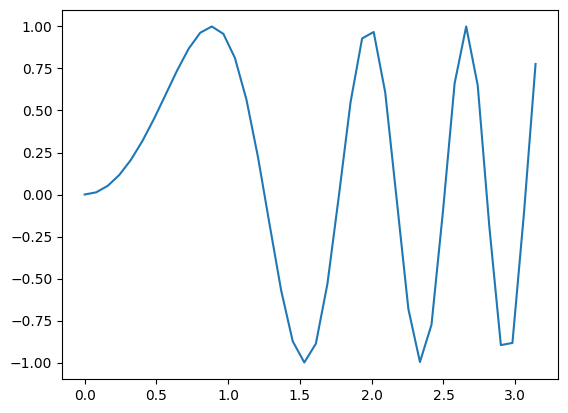

In [17]:
plt.plot(xI,yI)
plt.show()

In [18]:
f_try = interpolate.interp1d(xI, yI)

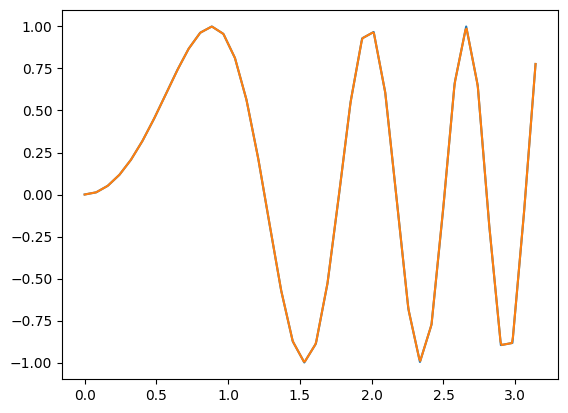

In [19]:
x_fine=np.linspace(0,np.pi,400)

plt.plot(xI,yI)
plt.plot(x_fine,f_try(x_fine))
plt.show()

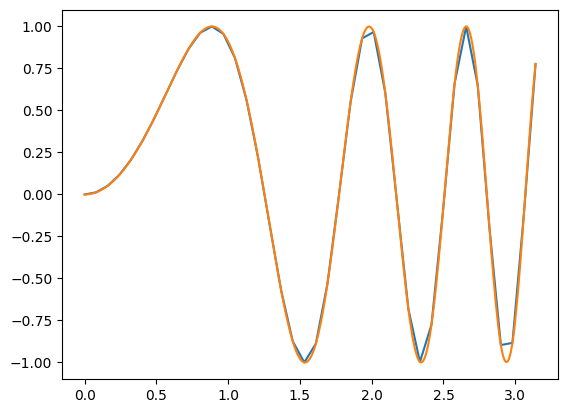

In [20]:
f_cube= interpolate.interp1d(xI, yI,kind='cubic')

plt.plot(xI,yI)
plt.plot(x_fine,f_cube(x_fine))
plt.show()

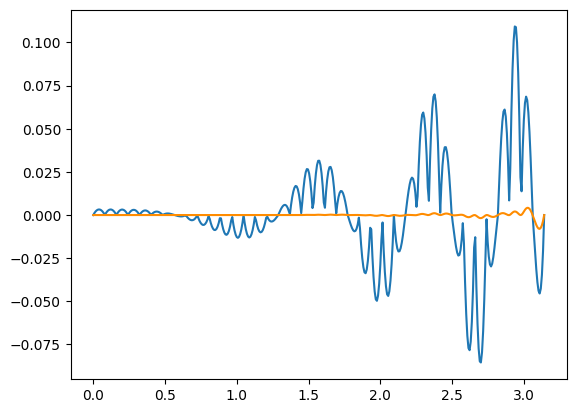

In [21]:
plt.plot(x_fine,f_try(x_fine)-np.sin(2*x_fine**2))
plt.plot(x_fine,f_cube(x_fine)-np.sin(2*x_fine**2),color='darkorange')
plt.show()

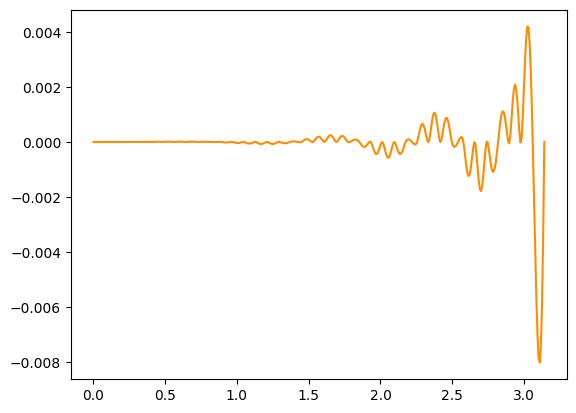

In [22]:
plt.plot(x_fine,f_cube(x_fine)-np.sin(2*x_fine**2),color='darkorange')
plt.show()

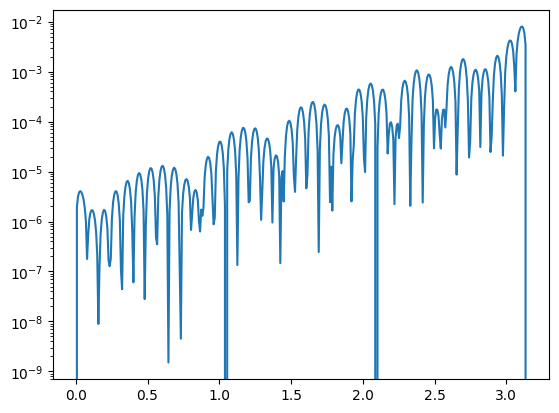

In [23]:
plt.plot(x_fine,np.abs(f_cube(x_fine)-np.sin(2*x_fine**2)))
plt.yscale('log')
plt.show()

In [24]:
op.newton(f_cube,1)

np.float64(1.253299665645062)

In [25]:
np.sin(2*1.2532996656450606**2)

np.float64(7.254977768854082e-05)

In [26]:
f_ext=interpolate.interp1d(xI,yI,fill_value='extrapolate',kind='cubic')

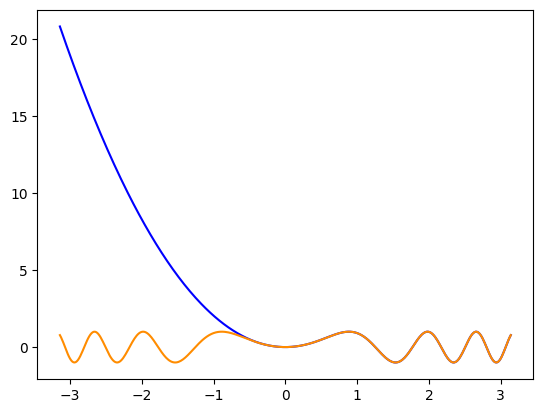

In [27]:
x_neg=np.linspace(-np.pi,np.pi,400)

plt.plot(x_neg,f_ext(x_neg),color='blue')
plt.plot(x_neg,np.sin(2*x_neg**2),color='darkorange')
plt.show()

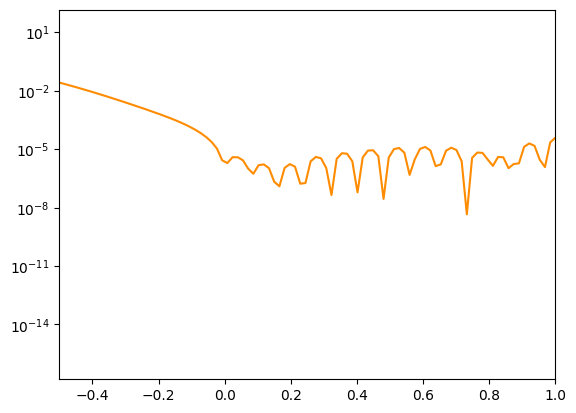

In [28]:
plt.plot(x_neg,abs(f_ext(x_neg)-np.sin(2*x_neg**2)),color='darkorange')
plt.yscale('log')
plt.xlim(-0.5,1)
plt.show()

In [35]:
from scipy.differentiate import derivative

In [38]:
def g(x):
    return x**3


derivative(g,1,initial_step=1e-5)

     success: True
      status: 0
          df: 2.9999999998864264
       error: 0.0
         nit: 2
        nfev: 11
           x: 1.0